<h1><center> $$ Apprentissage supervisé - Regression,
DecisionTreeRegressor, RandomForestRegressor $$ </center></h1>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import seaborn as sns; sns.set(style="white", color_codes=True)
import numpy as np; np.random.seed(0)
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats
import matplotlib.image as mpimg
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer

# 1 Préparation des données

## 1.1 Téléchargement de données

In [2]:
data= pd.read_csv('./housing.csv', sep = ",")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 1.2 Information sur les données

### 1 - Afficher les données

In [3]:

data.head


<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

### la valeur cible est "median_house_value", traitons-nous un problème de classification ou de régression
?

"L’objectif de ce projet d’apprentissage automatique est de pouvoir, à partir de plusieurs caractéristiques
(features), d’estimer les prix des maisons (target) dans l’état de la californie."


#la régression est un processus d'apprentissage machine supervisé qui s'apparente à la classification, sauf qu'au lieu de prédire des labels ont prédit des valeurs numériques. Dés que l'on doit prédire un nombre on adopte la régréssion.


### 2 -le nombre de lignes et de colonnes des données, le type des attributs
Quelle remarque sur l’attribut "total_bedrooms"
par rapport aux autres attributs ?
et le nombre de valeurs non nulles.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#vue d'ensemble des valeurs manquantes
def num_missing(x):
    return sum(x.isnull())

# On applique cette fonction pour chaque colonne:
print("Valeurs manquantes par colonne:")
print(data.apply(num_missing, axis=0)) #axis=0 définit que la fonction sera bien appliquée sur chaque colonne

# Puis application pour chaque ligne:
print("\nValeurs manquantes par ligne:")
print(data.apply(num_missing, axis=1).head())

Valeurs manquantes par colonne:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Valeurs manquantes par ligne:
0    0
1    0
2    0
3    0
4    0
dtype: int64


on constate qu'il y a 207 données nulles dans l'attribut "total bedroom"

### 3 - occurrence des valeurs utilisées dans l'attribut "ocean_proximity"

In [6]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### 4- statistiques sur les attributs du jeu de données

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 5- Créez un code qui affiche les histogrammes des différents attributs. Le nombre de "bins" à saisir est 50 et la taille de chaque histogramme "figsize=(20,15)".

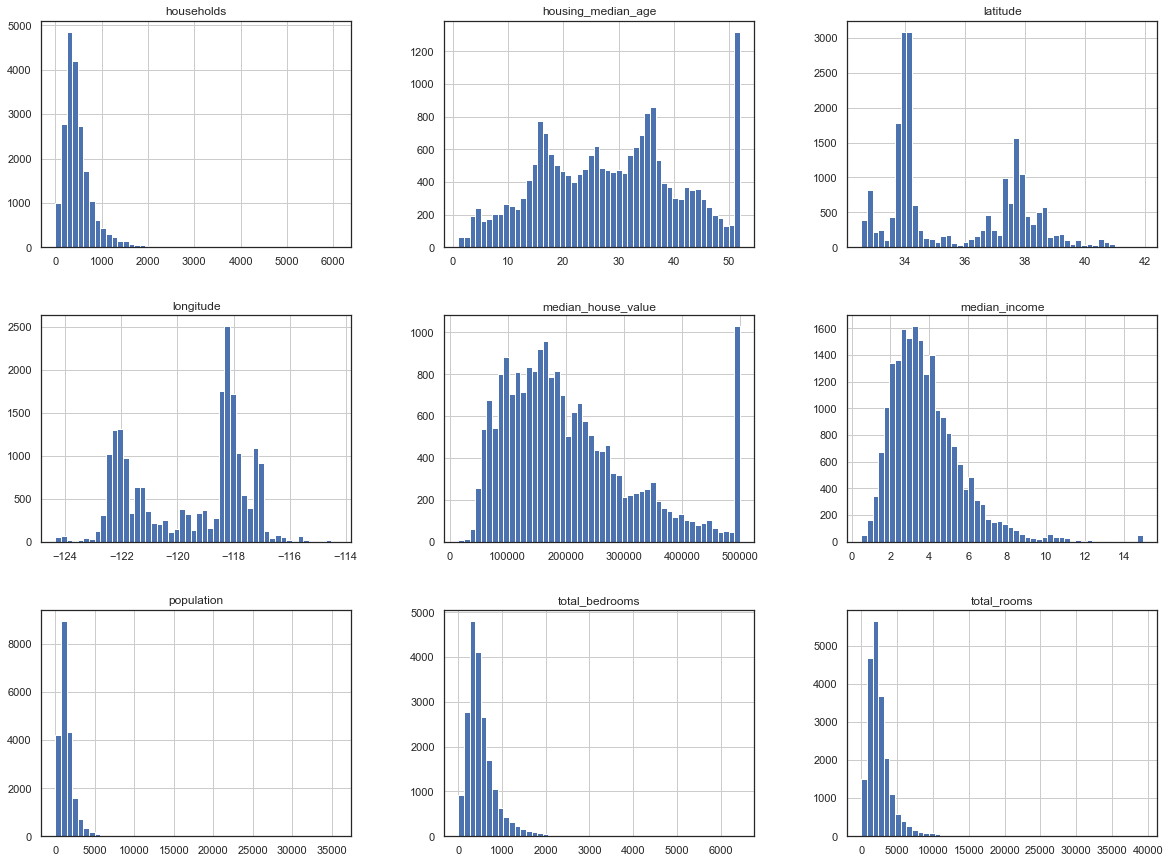

In [8]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

### 1.3 Répartition des données

### 1- Créez un code qui partitionne les données en base d’apprentissage et base de test. Optez pour 80% pour l’apprentissage et 20% pour le test.

In [9]:
data.shape

(20640, 10)

In [10]:
X = data.drop(columns=["median_house_value"])
y = data["median_house_value"]
lab = preprocessing.LabelEncoder()
X["ocean_proximity"] = lab.fit_transform(X["ocean_proximity"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.6401079709888612

### 2 afficher l'entête des colonnes

In [11]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,1
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,1
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,3
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,4


### 1-4 Découverte et visualisation des données

### 1- Créez un code qui affiche en abscisse la longitude et en ordonnée la latitude.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


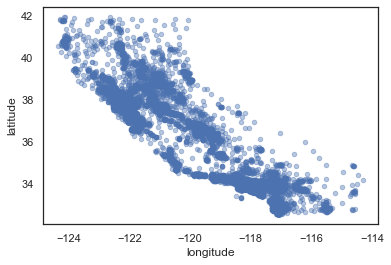

In [12]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()



### 2 - Créez un code qui permet d’avoir une idée sur le lien entre la position géographique et le prix des maisons (target).

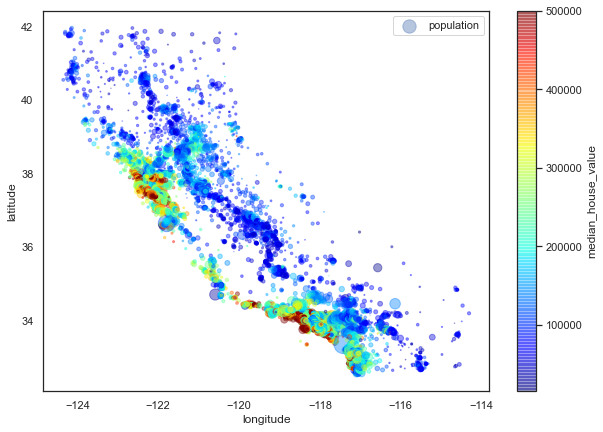

In [13]:
data.plot(kind="scatter", x="longitude", y="latitude",
    s=data['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, sharex=False, figsize=(10,7),
)
plt.legend()
plt.show()



### 3- Modifiez le graphe de la question précédente pour savoir la raison du prix élevé de quelques maisons.

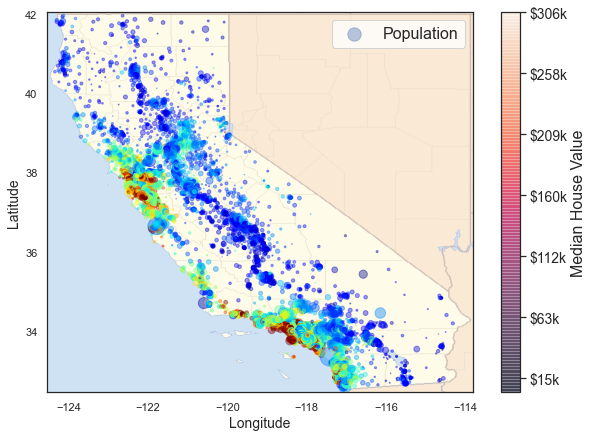

In [14]:
california_img=mpimg.imread('california.png')
ax = data.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=data['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = data["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()



<ipython-input-15-571e161e3960>:15: MatplotlibDeprecationWarning: 
The set_cmap function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_cmap instead.
  cbar.set_cmap("jet")


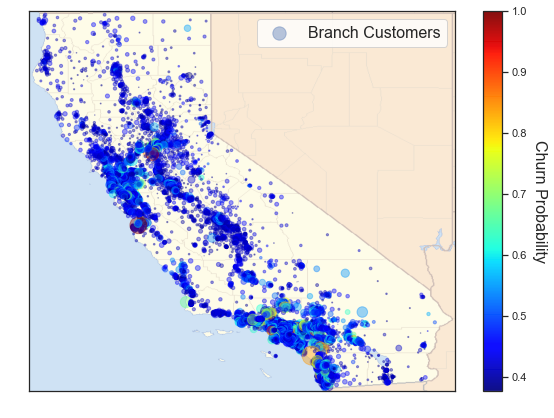

In [15]:


import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
ax = data.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=data['population']/100, label="Branch Customers",
                       c="total_bedrooms", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("", fontsize=14)
plt.xlabel("", fontsize=14)
plt.tick_params(colors='w')

prices = data["median_house_value"]
cbar = plt.colorbar()
cbar.set_cmap("jet")
cbar.solids.set_edgecolor("face")
cbar.solids.set_cmap("jet")
cbar.set_label('Churn Probability', fontsize=16, alpha=1, 
               rotation=270, labelpad=20)

plt.legend(fontsize=16)
plt.show()



### 1-4  Créez un code qui affiche, en valeur, la corrélation de l’attribut "median_
house_value" avec les autres attributs. Qu’est ce que vous remarquez ?

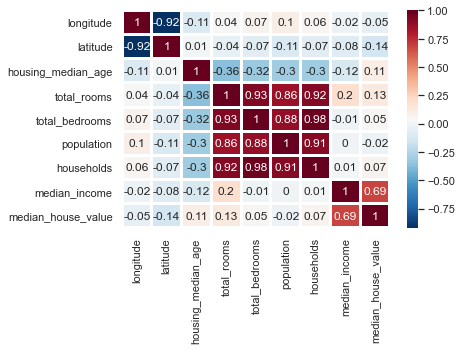

In [16]:
correlation_matrix =data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, cmap='RdBu_r', annot=True,linewidth=2)

### 1-5 Nettoyage des données

1. Créez un code permettant de créer deux variables :
• Une première contenant que les input. Utilisez la fonction drop du module pandas
• Une deuxième contenant que les labels. Utilisez la fonction copy du module pandas

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)


X = train_set.drop('median_house_value', axis=1) # drop labels for training set (x)
y= train_set['median_house_value'].copy()#(y)
#LABEL TARGET


2. Dans la question 8, vous avez dû remarquer que l’attribut "total_bedrooms" a des valeurs
manquantes (NaN). Pour remédier à ceci, il existes trois options :
• Supprimer les valeurs manquantes (NaN)
• Supprimer l’attribut "total_bedrooms"
• Remplacer les valeurs manquantes par une autre valeur (0, la moyenne, la médiane,
. . . ). Nous optons pour cette méthode. Ecrivez un code qui remplace les valeurs manquantes
par la médiane. Utilisez les fonctions median et fillna du module Pandas. Vérifiez
avec la fonction "info" si le problème a été résolu.

In [18]:
print(data['ocean_proximity'])

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object


In [19]:
X = data.drop(columns=["median_house_value"])
y = data["median_house_value"]
X["total_bedrooms"].fillna(X["total_bedrooms"].median(), inplace=True)
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB
None



3. Les algorithmes d’apprentissage profond préfère de travailler avec les données numériques.
Ceci est valable pour tous les attributs sauf "ocean_proximity". Vérifiez ceci en affichant 10
de ces valeurs. Transformer les valeurs qualitatives en des valeurs numériques.

In [20]:
lab = preprocessing.LabelEncoder()
X["ocean_proximity"] = lab.fit_transform(X["ocean_proximity"])
X["ocean_proximity"].head()

0    3
1    3
2    3
3    3
4    3
Name: ocean_proximity, dtype: int32

In [21]:
X.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,3
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,3
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,3
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,3


4. Affichez les données pour vérifier le résultat.

In [22]:
X["ocean_proximity"].head(10)

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: ocean_proximity, dtype: int32

# 2 Sélection, apprentissage et évaluation du modèle

## 2.1 Créez un code permettant d’appliquer la régression linéaire sur les données d’apprentissage.

In [23]:
X = data.drop(columns=["median_house_value"])
y = data["median_house_value"]
lab = preprocessing.LabelEncoder()
X["ocean_proximity"] = lab.fit_transform(X["ocean_proximity"])
X["total_bedrooms"].fillna(X["total_bedrooms"].median(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.6401079709888612

## 2.2 Créez un code qui prédit les classes de la base d’apprentissage. Pour ce faire, utilisez la méthode predict de la classe LinearRegression en donnant comme argument les données d’apprentissage. Ensuite, affichez les valeurs cible réelles et celles prédites

In [24]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

## 3. Calculez la mesure RMSE du modèle de la régression linéaire.

In [25]:
mse2 = mean_squared_error(y_train, y_pred_train)
print(mse2)

4810958229.787788


## 4 -Refaites les deux étapes précédentes avec le modèle DecisionTreeRegressor. Calculez la
mesure RMSE du modèle DecisionTreeRegressor qui existe dans le sous-module tree du
module sklearn.
Pour plus d’informations sur les arbres de décision:

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
model_decision = DecisionTreeRegressor(random_state =42)
model_decision.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [28]:
y_pred = model_decision.predict(X_train)
from sklearn.metrics import r2_score
print((model_decision.score(X_train,y_train)))
print((np.sqrt(mean_squared_error(y_train,y_pred))))

1.0
0.0


MSE = 0, Surapprentissage avec les arbres de regressions données non exploitables

### 2.5.

Même si la valeur de RMSE de DecisionTreeRegressor est égale à 0, on ne peut pas conclure que ce modèle fonctionne parfaitement sur la base d’apprentissage. Pour s’assurer, on va répartir la base d’apprentissage en base d’apprentissage et en base de test en utilisant la méthode 10-fold cross-validation. Pour ce faire, utilisez la fonction cross_val_score du sousmodule model_selection du module sklearn. Ensuite, affichez :

• La valeur RMSE de chaque fold (changez MSE par RMSE)

• La moyenne des RMSE de tous les folds  (changez MSE par RMSE)

• L’écart type de tous les folds

In [29]:
validcross = cross_val_score(model_decision, X_train, y_train, cv=10)
validcross

array([0.63933283, 0.63989045, 0.63534847, 0.57349012, 0.61797954,
       0.66594384, 0.6373525 , 0.63962735, 0.59763641, 0.6389786 ])

La validation croisée nous donne 10 K-folds compris entre 0,6 et 0,7

In [30]:
validcross.mean()

0.6285580099000441

In [31]:
validcross.std()

0.024692742495461828

l'ecart type étant proche de 0, nous pouvons en déduire que nous avons une faible dispersionde valeurs

# Fine-Tunning

## 3.1 Grid Search


 ### 1 Écrire un code qui :
• Crée un objet de la classe RandomForestRegressor

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
forest_regressor = RandomForestRegressor()

• Crée la variable suivante :
param_grid = [0n_estimators0 : [3, 10, 30],0 max_ f eatures0 : [2, 4, 6, 8]]
Cette variable contient un dictionnaire avec quelques valeurs de deux paramètres de la
méthode RandomForestRegressor. Au total, 4x3=12 combinaisons vont être testées.

In [33]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}
    ]



• Applique une recherche, de type GridSearch, du couple qui donne le meilleur résultat.
Pour ce faire, utilisez la fonction GridSearchCV du sous-module model_selection du
module sklearn. Optez pour une valeur de 5 pour "cv" (une validation croisée de type
5-fold cross-validation)

In [34]:
grid_search = GridSearchCV(forest_regressor, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             scoring='neg_mean_squared_error')

### 2. Affichez les meilleurs paramètres de la méthode RandomForestRegressor en utilisant la
fonction best_params_

In [35]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 10}

### 3. Affichez les résultats des 12 combinaisons avec la fonction grid-search

In [36]:
resultats = grid_search.cv_results_

print("{}\t\t {}\n".format('Mean Score','Parameters'))

for mean_score, params in zip(resultats["mean_test_score"], resultats["params"]):
    x = np.sqrt(-mean_score)
    y = params
    print("{:.2f}\t {}".format(x, y))

Mean Score		 Parameters

80849.12	 {'max_features': 2, 'n_estimators': 3}
70848.70	 {'max_features': 2, 'n_estimators': 10}
70903.62	 {'max_features': 2, 'n_estimators': 30}
79855.38	 {'max_features': 4, 'n_estimators': 3}
73656.83	 {'max_features': 4, 'n_estimators': 10}
71016.03	 {'max_features': 4, 'n_estimators': 30}
86324.75	 {'max_features': 6, 'n_estimators': 3}
75865.23	 {'max_features': 6, 'n_estimators': 10}
73287.63	 {'max_features': 6, 'n_estimators': 30}
82200.36	 {'max_features': 8, 'n_estimators': 3}
78132.50	 {'max_features': 8, 'n_estimators': 10}
75673.35	 {'max_features': 8, 'n_estimators': 30}


## 3.2 Evaluation sur la base de test



### 1. Remplacer les valeurs NaN de l’attribut "total_bedrooms" de la base de test par la médiane


In [ ]:
okay

### 2. Transformer les valeurs textuelles de "ocean_proximity" en valeurs numériques

In [ ]:
okay


### 3. Stocker le modèle d’apprentissage dans une variable en utilisant la fonction best_estimator_



### 4. Calculer la valeur RMSE du modèle sur la base de test

In [40]:
predictions = lr.predict(X_test)

mse = mean_squared_error(y_test, predictions)
predictions = lr.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(np.sqrt(mse))

71147.87146118362
